In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:50]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0]], dtype=uint8)

In [7]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(x,y,index):
  plt.figure(figsize=(15,0.3))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

In [8]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

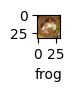

In [9]:
plot_sample(x_train,y_train,0)

In [10]:
x_train=x_train/255.0

In [11]:
x_test=x_test/255.0

In [12]:
ANN=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                       layers.Dense(3000,activation='relu'),
                       layers.Dense(1000,activation='relu'),
                       layers.Dense(10,activation='softmax')])

In [13]:
ANN.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ANN.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 172s 109ms/step - loss: 1.8133 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 169s 108ms/step - loss: 1.6226 - accuracy: 0.4292
Epoch 3/5
1563/1563 [==============================] - 163s 104ms/step - loss: 1.5430 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 162s 104ms/step - loss: 1.4834 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.4331 - accuracy: 0.4972


In [14]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict=ANN.predict(x_test)
y_predict_classes=[np.argmax(element)for element in y_predict]
print("classificationreport",classification_report(y_test,y_predict_classes))

313/313 [==============================] - 11s 35ms/step
classificationreport               precision    recall  f1-score   support

           0       0.51      0.56      0.53      1000
           1       0.66      0.49      0.56      1000
           2       0.32      0.47      0.38      1000
           3       0.43      0.14      0.21      1000
           4       0.57      0.18      0.27      1000
           5       0.39      0.42      0.40      1000
           6       0.43      0.70      0.53      1000
           7       0.53      0.56      0.54      1000
           8       0.50      0.70      0.59      1000
           9       0.57      0.51      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000

